## **Forecasting Daily Electricity Demand using Time Series Models**
Accurate forecasting of daily electricity demand is essential for energy providers to ensure cost-effective operations and meet consumption needs.


In [17]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Datasets/Time Series Project - Electricity Demand/Electricity Demand.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3939 entries, 0 to 3938
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           3939 non-null   object 
 1   Energy Required (MU)           3939 non-null   float64
 2   Energy Met (MU)                3939 non-null   float64
 3   Energy +/- (MU)                3939 non-null   float64
 4   Genco Thermal                  3939 non-null   float64
 5   Genco Hydel                    3939 non-null   float64
 6   Genco Total                    3939 non-null   float64
 7   CGS and Purchases              3939 non-null   float64
 8   IPPS (GAS)                     3939 non-null   float64
 9   NCEs & Others                  3939 non-null   float64
 10  AP Share of TGISTS             3939 non-null   float64
 11  Grand Total                    3939 non-null   float64
 12  Reversible Pump Consumption    3939 non-null   f

### **Inferences**
Your dataset contains 3,939 daily records with 15 columns. Here's a quick breakdown:
1. Date Column
"Date" is in format like "02-May-12" — need to convert it to datetime.
2. Target Variable (for Forecasting)
You can forecast one of the following:

**Energy Required (MU)**— total electricity needed (good for demand forecasting)

**Unrestricted Peak Demand (MW)**— highest daily demand (important for capacity planning)

For this project we will focus on forecasting:

**Energy Required (MU)** — the core target for daily electricity demand.

There are no missing values in the dataset

In [22]:
df['Date'] = pd.to_datetime(df['Date'], format="mixed")
df.set_index('Date',inplace=True)
df.head()

,Energy Required (MU),Energy Met (MU),Energy +/- (MU),Genco Thermal,Genco Hydel,Genco Total,CGS and Purchases,IPPS (GAS),NCEs & Others,AP Share of TGISTS,Grand Total,Reversible Pump Consumption,Unrestricted Peak Demand (MW),Deficit/Surplus (MW)
Date,,,,,,,,,,,,,,
2012-05-02,255.639,241.185,-14.454,103.643,5.276,108.919,77.106,42.752,12.408,0.0,241.185,0.0,12099,-1000
2012-05-03,258.470,243.370,-15.100,106.255,3.748,110.003,79.273,41.374,12.720,0.0,243.370,0.0,12219,-1500
2012-05-04,261.393,247.449,-13.944,106.153,6.527,112.680,82.753,39.385,12.631,0.0,247.449,0.0,11693,-1000
2012-05-05,252.866,237.919,-14.947,95.295,5.334,100.629,85.987,39.256,12.047,0.0,237.919,0.0,11636,-1000
2012-05-06,250.566,236.528,-14.038,95.862,4.494,100.356,86.762,38.017,11.393,0.0,236.528,0.0,11133,-700


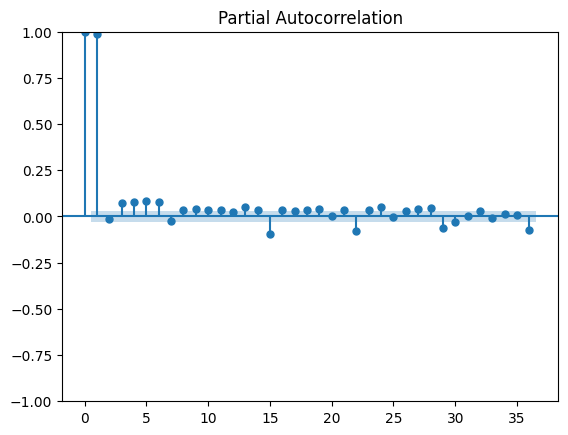

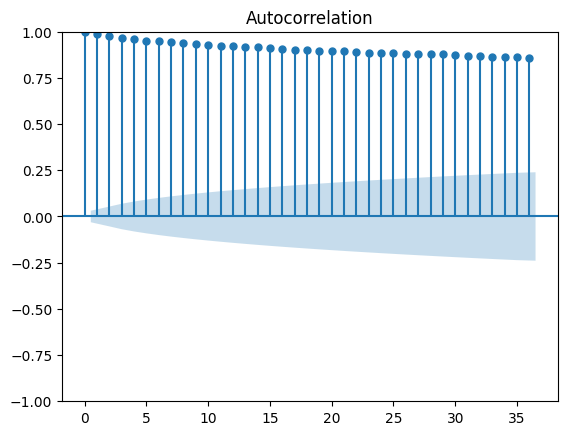

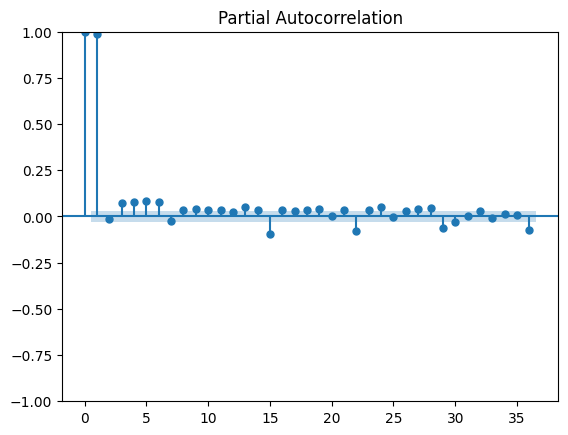

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df["Energy Required (MU)"])
plot_pacf(df["Energy Required (MU)"])

### **Inferences**

## **Feature Engineering**

In [27]:
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek #Time-based: hour, dayofweek, month, is_weekend
df["Energy_Required_t-1"] = df["Energy Required (MU)"].shift(1) #Lag features: Demand_t-1, t-24, t-168 (for hourly data)
df["RollingMean_7"] = df["Energy Required (MU)"].rolling(7).mean() #Rolling means: 7-day, 30-day
df.head(10)


,Energy Required (MU),Energy Met (MU),Energy +/- (MU),Genco Thermal,Genco Hydel,Genco Total,CGS and Purchases,IPPS (GAS),NCEs & Others,AP Share of TGISTS,Grand Total,Reversible Pump Consumption,Unrestricted Peak Demand (MW),Deficit/Surplus (MW),hour,dayofweek,Energy_Required_t-1,RollingMean_7
Date,,,,,,,,,,,,,,,,,,
2012-05-02,255.639,241.185,-14.454,103.643,5.276,108.919,77.106,42.752,12.408,0.0,241.185,0.0,12099,-1000,0,2,NaN,NaN
2012-05-03,258.470,243.370,-15.100,106.255,3.748,110.003,79.273,41.374,12.720,0.0,243.370,0.0,12219,-1500,0,3,255.639,NaN
2012-05-04,261.393,247.449,-13.944,106.153,6.527,112.680,82.753,39.385,12.631,0.0,247.449,0.0,11693,-1000,0,4,258.470,NaN
2012-05-05,252.866,237.919,-14.947,95.295,5.334,100.629,85.987,39.256,12.047,0.0,237.919,0.0,11636,-1000,0,5,261.393,NaN
2012-05-06,250.566,236.528,-14.038,95.862,4.494,100.356,86.762,38.017,11.393,0.0,236.528,0.0,11133,-700,0,6,252.866,NaN
2012-05-07,258.248,236.157,-22.091,97.358,5.867,103.225,83.502,37.397,12.033,0.0,236.157,0.0,11475,-900,0,0,250.566,NaN
2012-05-08,263.541,242.967,-20.574,101.951,6.609,108.560,84.904,37.426,12.077,0.0,242.967,0.0,11403,-1000,0,1,258.248,257.246143
2012-05-09,266.493,248.327,-18.166,106.344,4.334,110.678,81.923,43.587,12.139,0.0,248.327,0.0,11481,-800,0,2,263.541,258.796714
2012-05-10,254.416,236.666,-17.750,101.765,3.633,105.398,74.886,43.818,12.564,0.0,236.666,0.0,11354,-1000,0,3,266.493,258.217571


## **Building the Model without removing missing values**

In [29]:
X=df.drop(columns=["Energy Required (MU)"])
y=df["Energy Required (MU)"]

In [30]:
X.shape

(3939, 17)

In [31]:
y.shape

(3939,)

In [32]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model=XGBRegressor()
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)

15.908427307930296


In [33]:
import numpy as np
df['Energy Required (MU)'].mean()

np.float64(185.79982381315057)

In [34]:
df['Energy Required (MU)'].std()

47.048485267929046

Avg Demand	MSE 15.9 means...	Good?

~100 MW	- Errors of ±4 MW are reasonable	- 👍 Possibly good

~10 MW	- Errors of ±4 MW are huge	- 🚫 Not good

~500 MW	- Errors of ±4 MW are tiny	- ✅ Very good

Here my mean is 185.79, So Errors of ±4 MW are reasonable.

### **NOTE: How to identify is your MSE is good or bad?**

Mean of the target variable is 185.79982381315057

Standard deviation is 47.048485267929046

MSE is 15.908427307930296

RMSE is ~ 3.99 = sqrt(15.908427307930296)

### **Interpretation**
RMSE (3.99 MW) is only about 2.1% of the mean (185.79)
That's very good in most practical applications.

Compared to standard deviation (47.05):
The model's average error (3.99 MW) is much smaller than the typical fluctuation in the data.

So the model is capturing the trend very well.

Conclusion: Is 15.9 MSE Good?
YES — It's excellent for this scale of data.

So, the model,

Makes small average errors (±4 MW) compared to ~186 MW daily demand
Explains a large portion of variation (likely high R², if you check it)